# TOPIC : COVID-19 Detection Using Chest X-ray

Members :
* Abhishek Kumar (202IT001)
* Nitin Sharma (202IT017)

## Helper -test code

Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing required libraries

In [ ]:
# import pandas as pd
# import os
# import shutil

In [ ]:
# Target_dir="/content/drive/MyDrive/Dataset/train"
# if not os.path.exists(Target_dir):
#   os.mkdir(Target_dir)
#   print("train folder created")

In [ ]:
# Target_dir="/content/drive/MyDrive/Dataset/test"
# if not os.path.exists(Target_dir):
#   os.mkdir(Target_dir)
#   print("test folder created")

Copying covid train data


In [ ]:
# import random
# source_file_path="/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID"
# target_file_path="/content/drive/MyDrive/Dataset/train/covid"

In [ ]:
# image_names=os.listdir(source_file_path)

In [ ]:
# random.shuffle(image_names)

In [ ]:
# for i in range(0,1500):
#   image_name=image_names[i]
#   image_path=os.path.join(source_file_path,image_name)
#   target_path=os.path.join(target_file_path,image_name)
#   shutil.copy2(image_path,target_path)

In [ ]:
# target_file_path1="/content/drive/MyDrive/Dataset/test/covid"

In [ ]:
# for i in range(1500,3000):
#   image_name=image_names[i]
#   image_path=os.path.join(source_file_path,image_name)
#   target_path=os.path.join(target_file_path1,image_name)
#   shutil.copy2(image_path,target_path)

Copying Normal data

In [ ]:
# source_file_path1="/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal"
# target_file_path2="/content/drive/MyDrive/Dataset/train/Normal"

In [ ]:
# image_names1=os.listdir(source_file_path1)
# random.shuffle(image_names1)

In [ ]:
# for i in range(0,1500):
#   image_name1=image_names1[i]
#   image_path1=os.path.join(source_file_path1,image_name1)
#   target_path1=os.path.join(target_file_path2,image_name1)
#   shutil.copy2(image_path1,target_path1)

In [ ]:
# target_file_path3="/content/drive/MyDrive/Dataset/test/Normal"

In [ ]:
# for i in range(1500,3000):
#   image_name1=image_names1[i]
#   image_path1=os.path.join(source_file_path1,image_name1)
#   target_path1=os.path.join(target_file_path3,image_name1)
#   shutil.copy2(image_path1,target_path1)

In [ ]:
# Data_Dir = "/content/drive/MyDrive/COVID-19_Radiography_Dataset//"

In [ ]:
# Cimages = os.listdir(Data_Dir+"COVID")
# Nimages = os.listdir(Data_Dir+"Normal")

Visualisation of Covid VS Normal chest x-ray image

Normal Chest X-ray Vs Covid-19 Chest X-ray


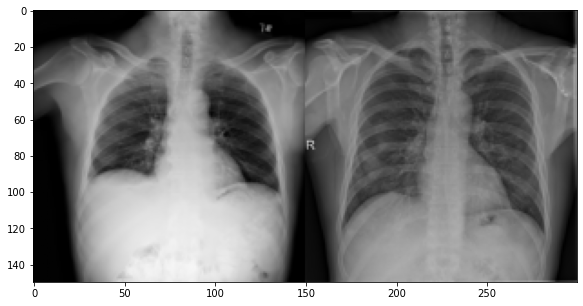

Normal Chest X-ray Vs Covid-19 Chest X-ray


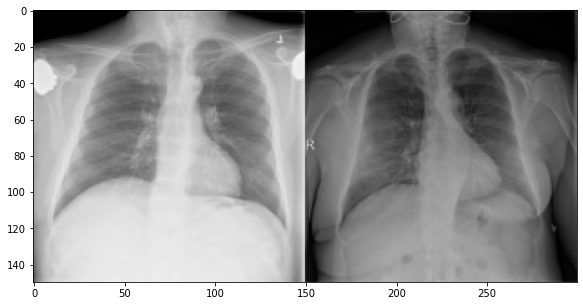

Normal Chest X-ray Vs Covid-19 Chest X-ray


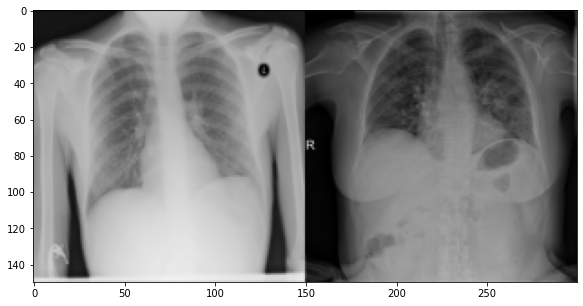

Normal Chest X-ray Vs Covid-19 Chest X-ray


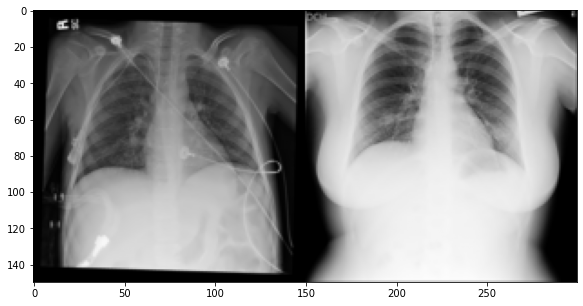

Normal Chest X-ray Vs Covid-19 Chest X-ray


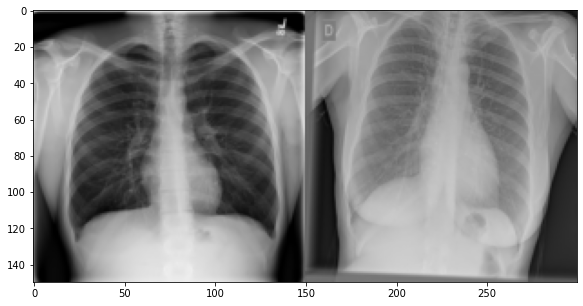

In [ ]:
# import matplotlib.pyplot as plt
# import cv2
# import skimage
# from skimage.transform import resize
# import numpy as np
# def plotter(i):
#     normal = cv2.imread(Data_Dir+"Normal//"+Nimages[i])
#     normal = skimage.transform.resize(normal, (150, 150, 3))
#     coronavirus = cv2.imread(Data_Dir+"COVID//"+Cimages[i])
#     coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
#     pair = np.concatenate((normal, coronavirus), axis=1)
#     print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
#     plt.figure(figsize=(10,5))
#     plt.imshow(pair)
#     plt.show()
# for i in range(0,5):
#     plotter(i)

## Custom CNN building

In [ ]:
%%capture
!wget http://cb.lk/covid_19
!unzip covid_19

Importing required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

Preprocessing

In [ ]:
train_datagen = image.ImageDataGenerator(
 rescale=1./255,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip = True)

val_dataset = image.ImageDataGenerator(
 rescale=1./255,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip = True)

test_dataset = image.ImageDataGenerator(
 rescale=1./255,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip = True)


train_generator = train_datagen.flow_from_directory(
    "/content/CovidDataset/Train",
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary')

validation_generator = val_dataset.flow_from_directory(
    "/content/CovidDataset/Val",
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary')

test_generator = test_dataset.flow_from_directory(
    "/content/CovidDataset/Val",
    target_size = (224, 224))

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
classes=train_generator.class_indices

In [ ]:
all_class=list(classes.keys())
all_class

['Covid', 'Normal']

In [ ]:
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

{'Covid': 0, 'Normal': 1}
{'Covid': 0, 'Normal': 1}
{'Covid': 0, 'Normal': 1}


# Building CNN model from Scratch



1.   We have created our own CNN model from the scratch in which there are four blocks.
2.    In the first block we have two conv layer  with 32 and 64 respectively kernels of size 3*3 and after that we have a max pooling layer with pool size as 2*2 .
3.   Apart from the first block, In all other blocks other than last block, we have a single Convolution layer with 64 ,128 filters and filter size as 3*3 and then a max pooling layer with pool size as 2*2. 

4.   In the last block we have two dense layers and at the last layer we have sigmoid as activation function because we have to do the binary classification. We also added a dropout layer with value 0.25.





In [ ]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
10/10 [==============================] - 52s 800ms/step - loss: 1.0914 - accuracy: 0.5249 - val_loss: 0.6513 - val_accuracy: 0.8125
Epoch 2/15
10/10 [==============================] - 7s 689ms/step - loss: 0.6443 - accuracy: 0.5957 - val_loss: 0.5591 - val_accuracy: 0.8438
Epoch 3/15
10/10 [==============================] - 7s 705ms/step - loss: 0.4396 - accuracy: 0.7954 - val_loss: 0.2479 - val_accuracy: 0.9375
Epoch 4/15
10/10 [==============================] - 7s 726ms/step - loss: 0.2927 - accuracy: 0.8844 - val_loss: 0.3371 - val_accuracy: 0.9375
Epoch 5/15
10/10 [==============================] - 7s 697ms/step - loss: 0.2789 - accuracy: 0.9080 - val_loss: 0.0933 - val_accuracy: 1.0000
Epoch 6/15
10/10 [==============================] - 7s 708ms/step - loss: 0.1770 - accuracy: 0.8974 - val_loss: 0.1832 - val_accuracy: 0.9688
Epoch 7/15
10/10 [==============================] - 7s 698ms/step - loss: 0.1502 - accuracy: 0.9522 - val_loss: 0.0756 - val_accuracy: 0.9688
Epoch

In [ ]:
def vis_training(hlist, start=1):
    
    loss = np.concatenate([h.history['loss'] for h in hlist])
    val_loss = np.concatenate([h.history['val_loss'] for h in hlist])
    acc = np.concatenate([h.history['accuracy'] for h in hlist])
    val_acc = np.concatenate([h.history['val_accuracy'] for h in hlist])
    
    epoch_range = range(1,len(loss)+1)

    plt.figure(figsize=[12,6])
    plt.subplot(1,2,1)
    plt.plot(epoch_range[start-1:], loss[start-1:], label='Training Loss')
    plt.plot(epoch_range[start-1:], val_loss[start-1:], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epoch_range[start-1:], acc[start-1:], label='Training Accuracy')
    plt.plot(epoch_range[start-1:], val_acc[start-1:], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

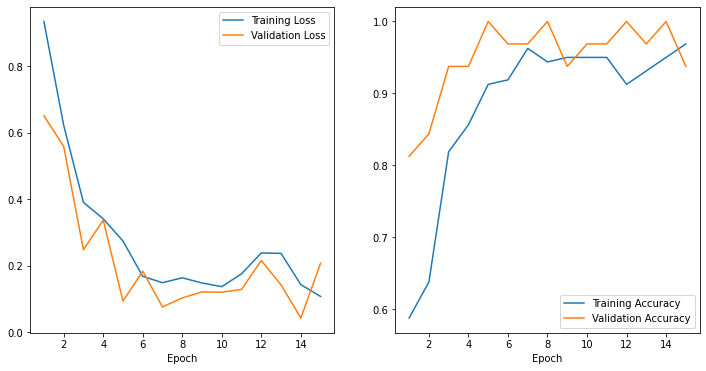

In [ ]:
vis_training([hist])

In [ ]:
model.evaluate(validation_generator)

4/4 [==============================] - 3s 675ms/step - loss: 0.0932 - accuracy: 0.9667


[0.09317929297685623, 0.9666666388511658]

In [ ]:
model.save("my_model1")

INFO:tensorflow:Assets written to: my_model1/assets


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as pl
import os

In [ ]:
classifier =load_model('/content/my_model1')

In [ ]:
Test_dir="/content/CovidDataset/Val//"

In [ ]:
t_c_images = os.listdir(Test_dir+"Covid")
t_n_images = os.listdir(Test_dir+"Normal")

Actual class

   Covid                           Vs                 Normal 


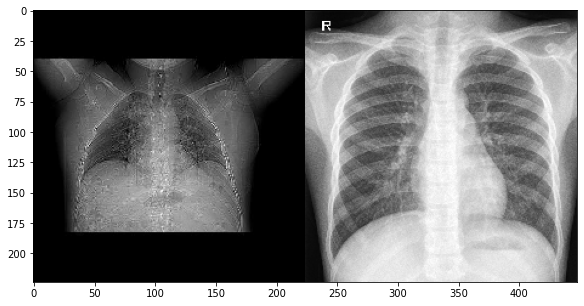

Predicted....

   Covid                                            Normal    
Actual class

   Covid                           Vs                 Normal 


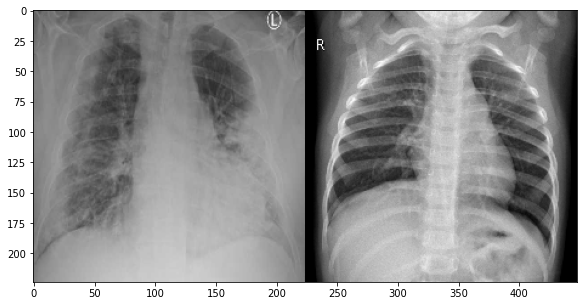

Predicted....

   Covid                                            Normal    
Actual class

   Covid                           Vs                 Normal 


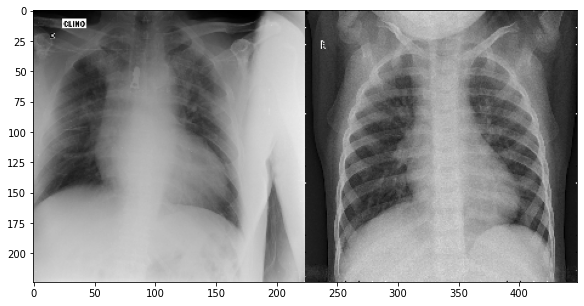

Predicted....

   Covid                                            Normal    
Actual class

   Covid                           Vs                 Normal 


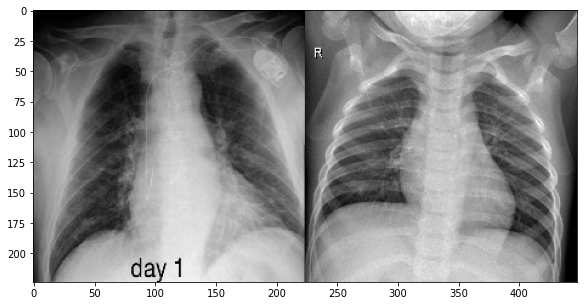

Predicted....

   Covid                                            Normal    
Actual class

   Covid                           Vs                 Normal 


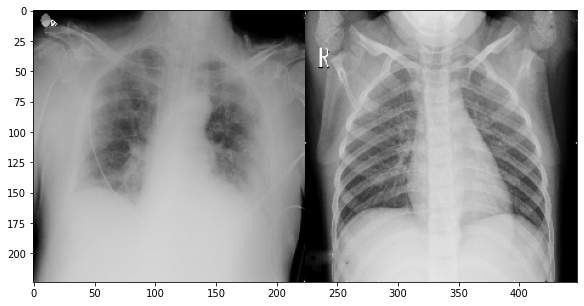

Predicted....

   Covid                                            Normal    


In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    #Actual 
    Covid = image.load_img(Test_dir+"Covid//"+t_c_images[i],target_size=(224,224,3))

    Normal = image.load_img(Test_dir+"Normal//"+t_n_images[i],target_size=(224,224,3))

    pair = np.concatenate((Covid, Normal), axis=1)

    print("Actual class")
    print()
    print("   Covid                           Vs                 Normal ")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
    #Predicted
    print("Predicted....")
    print()
    Covid_array = image.img_to_array(Covid)
    Covid_array = Covid_array/255.0
    #Covid_array = tf.image.rgb_to_grayscale(Covid_array)
    Covid_array = np.expand_dims(Covid_array, axis=0)
    prediction1=classifier.predict(Covid_array)
    if prediction1==0:
        covid_label="Covid"
    else:
        covid_label="Normal"

    Normal_array = image.img_to_array(Normal)
    Normal_array = Normal_array/255.0
    #Normal_array = tf.image.rgb_to_grayscale(Normal_array)
    Normal_array = np.expand_dims(Normal_array, axis=0)
    prediction2=classifier.predict(Normal_array)
    if prediction2==1:
        normal_label="Normal"
    else:
        normal_label="Covid"


    print("  ",normal_label,"                                          ",covid_label,"   ")

for i in range(0,5):
    plotter(i)